In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Aisyahazwn/Assignment1DS.git

Cloning into 'Assignment1DS'...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Patient Survival Prediction.csv')

In [ ]:
print(data)

       encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
69994        111550      120089           13  64.0  24.208110   
69995         68664       76520          125  71.0  22.564743   
69996         53055      126225          185  83.0  23.007812   
69997         53081       41914          157  83.0  32.574937   
69998         95459      128546          139  63.0  49.503653   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0          

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   69999 non-null  int64  
 1   patient_id                     69999 non-null  int64  
 2   hospital_id                    69999 non-null  int64  
 3   age                            66735 non-null  float64
 4   bmi                            67125 non-null  float64
 5   elective_surgery               69999 non-null  int64  
 6   ethnicity                      69382 non-null  object 
 7   gender                         69975 non-null  object 
 8   height                         69086 non-null  float64
 9   icu_admit_source               69901 non-null  object 
 10  icu_id                         69999 non-null  int64  
 11  icu_stay_type                  69999 non-null  object 
 12  icu_type                       69999 non-null 

In [ ]:
#min
min = data['d1_mbp_min'].min()

#max
max = data['h1_heartrate_max'].max()

#mean
mean = data['weight'].mean()

#median
median = data['height'].median()

#mode
mode= data['apache_3j_diagnosis'].mode()

#standard deviation
std_dev = data['gcs_eyes_apache'].std()

In [ ]:
# Calculating the IQR
quartiles = data['apache_2_diagnosis'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

188.0


In [ ]:
corr_matrix = data.corr()
corr_matrix

<ipython-input-14-b20f780b4413>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 82,hospital_death
encounter_id,1.000000,-0.012148,-0.004440,-0.005691,-0.000782,0.005494,-0.006816,-0.001960,0.001228,-0.004654,...,0.004126,0.010019,0.003551,0.001301,-0.000680,-0.002213,-0.005475,-0.001633,NaN,-0.005400
patient_id,-0.012148,1.000000,-0.008781,0.005399,-0.004452,0.001717,0.002728,0.001385,-0.005226,-0.002233,...,-0.004733,0.000727,-0.000454,-0.003784,0.002379,0.003011,0.003284,-0.004473,NaN,0.005254
hospital_id,-0.004440,-0.008781,1.000000,-0.009196,0.007721,0.062565,0.027075,-0.103432,0.007050,0.020985,...,-0.003757,0.009657,0.018502,0.009321,0.003812,-0.005951,0.004021,-0.005146,NaN,-0.001042
age,-0.005691,0.005399,-0.009196,1.000000,-0.094309,0.066587,-0.105254,-0.010441,0.043080,-0.132182,...,-0.031468,-0.031820,0.075854,-0.022578,0.022697,0.027767,0.022765,0.024707,NaN,0.113077
bmi,-0.000782,-0.004452,0.007721,-0.094309,1.000000,0.013252,-0.059263,0.001059,-0.003400,0.876099,...,-0.023005,-0.001397,0.171718,-0.002587,-0.029426,-0.012486,-0.010336,-0.044206,NaN,-0.033840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
leukemia,-0.002213,0.003011,-0.005951,0.027767,-0.012486,-0.019425,0.002629,0.000016,0.040521,-0.012320,...,-0.002575,-0.007053,0.002037,-0.004357,0.142668,1.000000,0.036514,0.008677,NaN,0.034576
lymphoma,-0.005475,0.003284,0.004021,0.022765,-0.010336,-0.008397,0.007894,0.002452,0.013184,-0.005689,...,0.019524,0.003240,-0.001825,0.003124,0.110612,0.036514,1.000000,0.012708,NaN,0.021622
solid_tumor_with_metastasis,-0.001633,-0.004473,-0.005146,0.024707,-0.044206,0.013851,0.006528,-0.003664,0.034037,-0.039441,...,-0.001348,-0.008945,-0.014381,0.007663,0.270644,0.008677,0.012708,1.000000,NaN,0.054976
Unnamed: 82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data['height'].corr(data['weight']))

0.3909253989700395


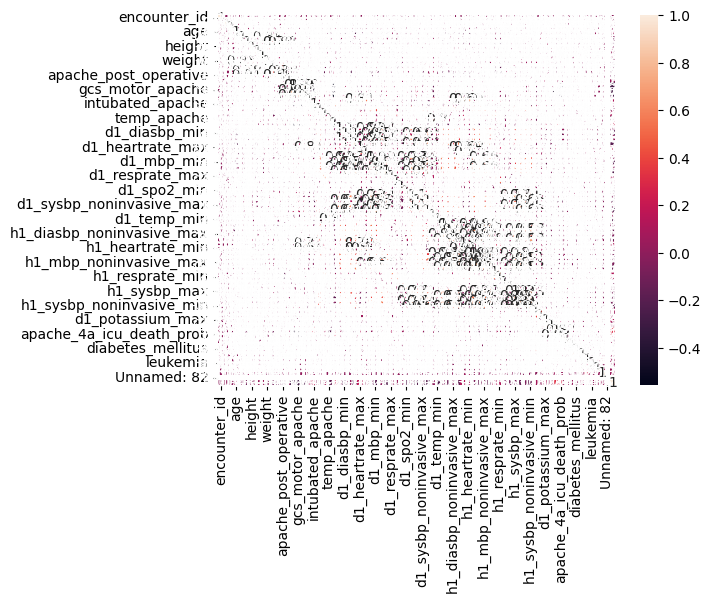

In [ ]:
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()

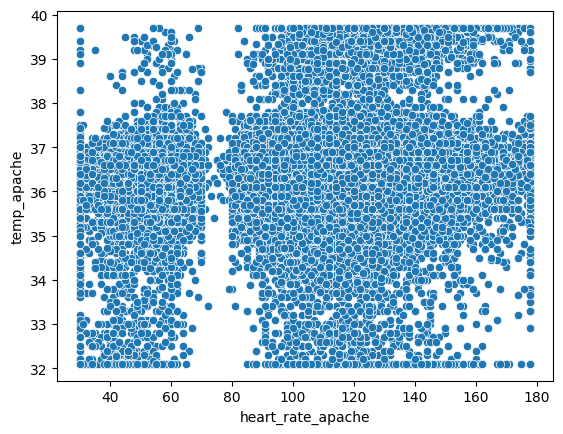

In [ ]:
sn.scatterplot(x="heart_rate_apache", y="temp_apache", data=data);

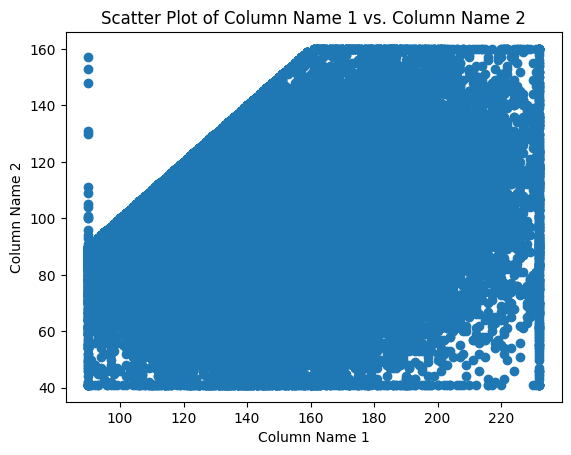

In [ ]:
x = data['d1_sysbp_max']
y = data['d1_sysbp_min']

plt.scatter(x, y)
plt.xlabel('Column Name 1')
plt.ylabel('Column Name 2')
plt.title('Scatter Plot of Column Name 1 vs. Column Name 2')
plt.show()